In [11]:
import pandas as pd
# Set global float formatting to 2 decimal places
pd.set_option('display.float_format', '{:,.2f}'.format)
import seaborn as sns
titanic_data = pd.read_csv("titanic/train.csv")
print(titanic_data.drop(columns=["PassengerId"]).head(20).to_latex(index=False, float_format="%.2f"))

\begin{tabular}{rrllrrrlrll}
\toprule
Survived & Pclass & Name & Sex & Age & SibSp & Parch & Ticket & Fare & Cabin & Embarked \\
\midrule
0 & 3 & Braund, Mr. Owen Harris & male & 22.00 & 1 & 0 & A/5 21171 & 7.25 & NaN & S \\
1 & 1 & Cumings, Mrs. John Bradley (Florence Briggs Thayer) & female & 38.00 & 1 & 0 & PC 17599 & 71.28 & C85 & C \\
1 & 3 & Heikkinen, Miss. Laina & female & 26.00 & 0 & 0 & STON/O2. 3101282 & 7.92 & NaN & S \\
1 & 1 & Futrelle, Mrs. Jacques Heath (Lily May Peel) & female & 35.00 & 1 & 0 & 113803 & 53.10 & C123 & S \\
0 & 3 & Allen, Mr. William Henry & male & 35.00 & 0 & 0 & 373450 & 8.05 & NaN & S \\
0 & 3 & Moran, Mr. James & male & NaN & 0 & 0 & 330877 & 8.46 & NaN & Q \\
0 & 1 & McCarthy, Mr. Timothy J & male & 54.00 & 0 & 0 & 17463 & 51.86 & E46 & S \\
0 & 3 & Palsson, Master. Gosta Leonard & male & 2.00 & 3 & 1 & 349909 & 21.07 & NaN & S \\
1 & 3 & Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg) & female & 27.00 & 0 & 2 & 347742 & 11.13 & NaN & S \\
1 & 2 

In [65]:
titanic_data.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [15]:
print(titanic_data.drop(columns="PassengerId").describe().to_latex(index=True, float_format="%.2f"))

\begin{tabular}{lrrrrrr}
\toprule
 & Survived & Pclass & Age & SibSp & Parch & Fare \\
\midrule
count & 891.00 & 891.00 & 714.00 & 891.00 & 891.00 & 891.00 \\
mean & 0.38 & 2.31 & 29.70 & 0.52 & 0.38 & 32.20 \\
std & 0.49 & 0.84 & 14.53 & 1.10 & 0.81 & 49.69 \\
min & 0.00 & 1.00 & 0.42 & 0.00 & 0.00 & 0.00 \\
25% & 0.00 & 2.00 & 20.12 & 0.00 & 0.00 & 7.91 \\
50% & 0.00 & 3.00 & 28.00 & 0.00 & 0.00 & 14.45 \\
75% & 1.00 & 3.00 & 38.00 & 1.00 & 0.00 & 31.00 \\
max & 1.00 & 3.00 & 80.00 & 8.00 & 6.00 & 512.33 \\
\bottomrule
\end{tabular}



In [67]:
titanic_data.count()

PassengerId    891
Survived       891
Pclass         891
Name           891
Sex            891
Age            714
SibSp          891
Parch          891
Ticket         891
Fare           891
Cabin          204
Embarked       889
dtype: int64

<p>Missing data in Age, Cabin, and Embarked</p>

In [68]:
titanic_data['Age'].value_counts(dropna=False)

Age
NaN      177
24.00     30
22.00     27
18.00     26
28.00     25
        ... 
36.50      1
55.50      1
0.92       1
23.50      1
74.00      1
Name: count, Length: 89, dtype: int64

In [69]:
titanic_data['Age_exists'] = ~titanic_data.Age.isna()

In [70]:
# mean and median age by class
for pclass in titanic_data.Pclass.unique():
    print(f"{pclass} class mean age: {titanic_data.loc[titanic_data.Pclass == pclass, "Age"].mean()}")
    print(f"{pclass} class std age: {titanic_data.loc[titanic_data.Pclass == pclass, "Age"].std()}")

3 class mean age: 25.14061971830986
3 class std age: 12.495398210982415
1 class mean age: 38.233440860215055
1 class std age: 14.802855896450462
2 class mean age: 29.87763005780347
2 class std age: 14.001076812476201


In [71]:
titanic_data['Ticket'].value_counts(dropna=False)

Ticket
347082      7
CA. 2343    7
1601        7
3101295     6
CA 2144     6
           ..
9234        1
19988       1
2693        1
PC 17612    1
370376      1
Name: count, Length: 681, dtype: int64

In [72]:
titanic_data['Cabin'].value_counts(dropna=False)

Cabin
NaN            687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: count, Length: 148, dtype: int64

In [73]:
titanic_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'Age_exists'],
      dtype='object')

In [74]:
titanic_numeric = titanic_data.copy()
titanic_numeric.drop(columns=["PassengerId", "Name", "Ticket", "Cabin"], inplace=True)
titanic_numeric.Sex.replace({"male":0, "female":1}, inplace=True)
#titanic_numeric.Embarked.replace({"C":0, "Q":1, "S":2}, inplace=True)
#embarked_dummies = pd.get_dummies(titanic_numeric, prefix="Embarked")
titanic_numeric 

/var/folders/5h/2vw4rj5908l26t38hd8pzjyc0000gn/T/ipykernel_49761/3087948297.py:3: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  titanic_numeric.Sex.replace({"male":0, "female":1}, inplace=True)
/var/folders/5h/2vw4rj5908l26t38hd8pzjyc0000gn/T/ipykernel_49761/3087948297.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_d

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_exists
0,0,3,0,22.0,1,0,7.2500,S,True
1,1,1,1,38.0,1,0,71.2833,C,True
2,1,3,1,26.0,0,0,7.9250,S,True
3,1,1,1,35.0,1,0,53.1000,S,True
4,0,3,0,35.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,True
887,1,1,1,19.0,0,0,30.0000,S,True
888,0,3,1,NaN,1,2,23.4500,S,False
889,1,1,0,26.0,0,0,30.0000,C,True


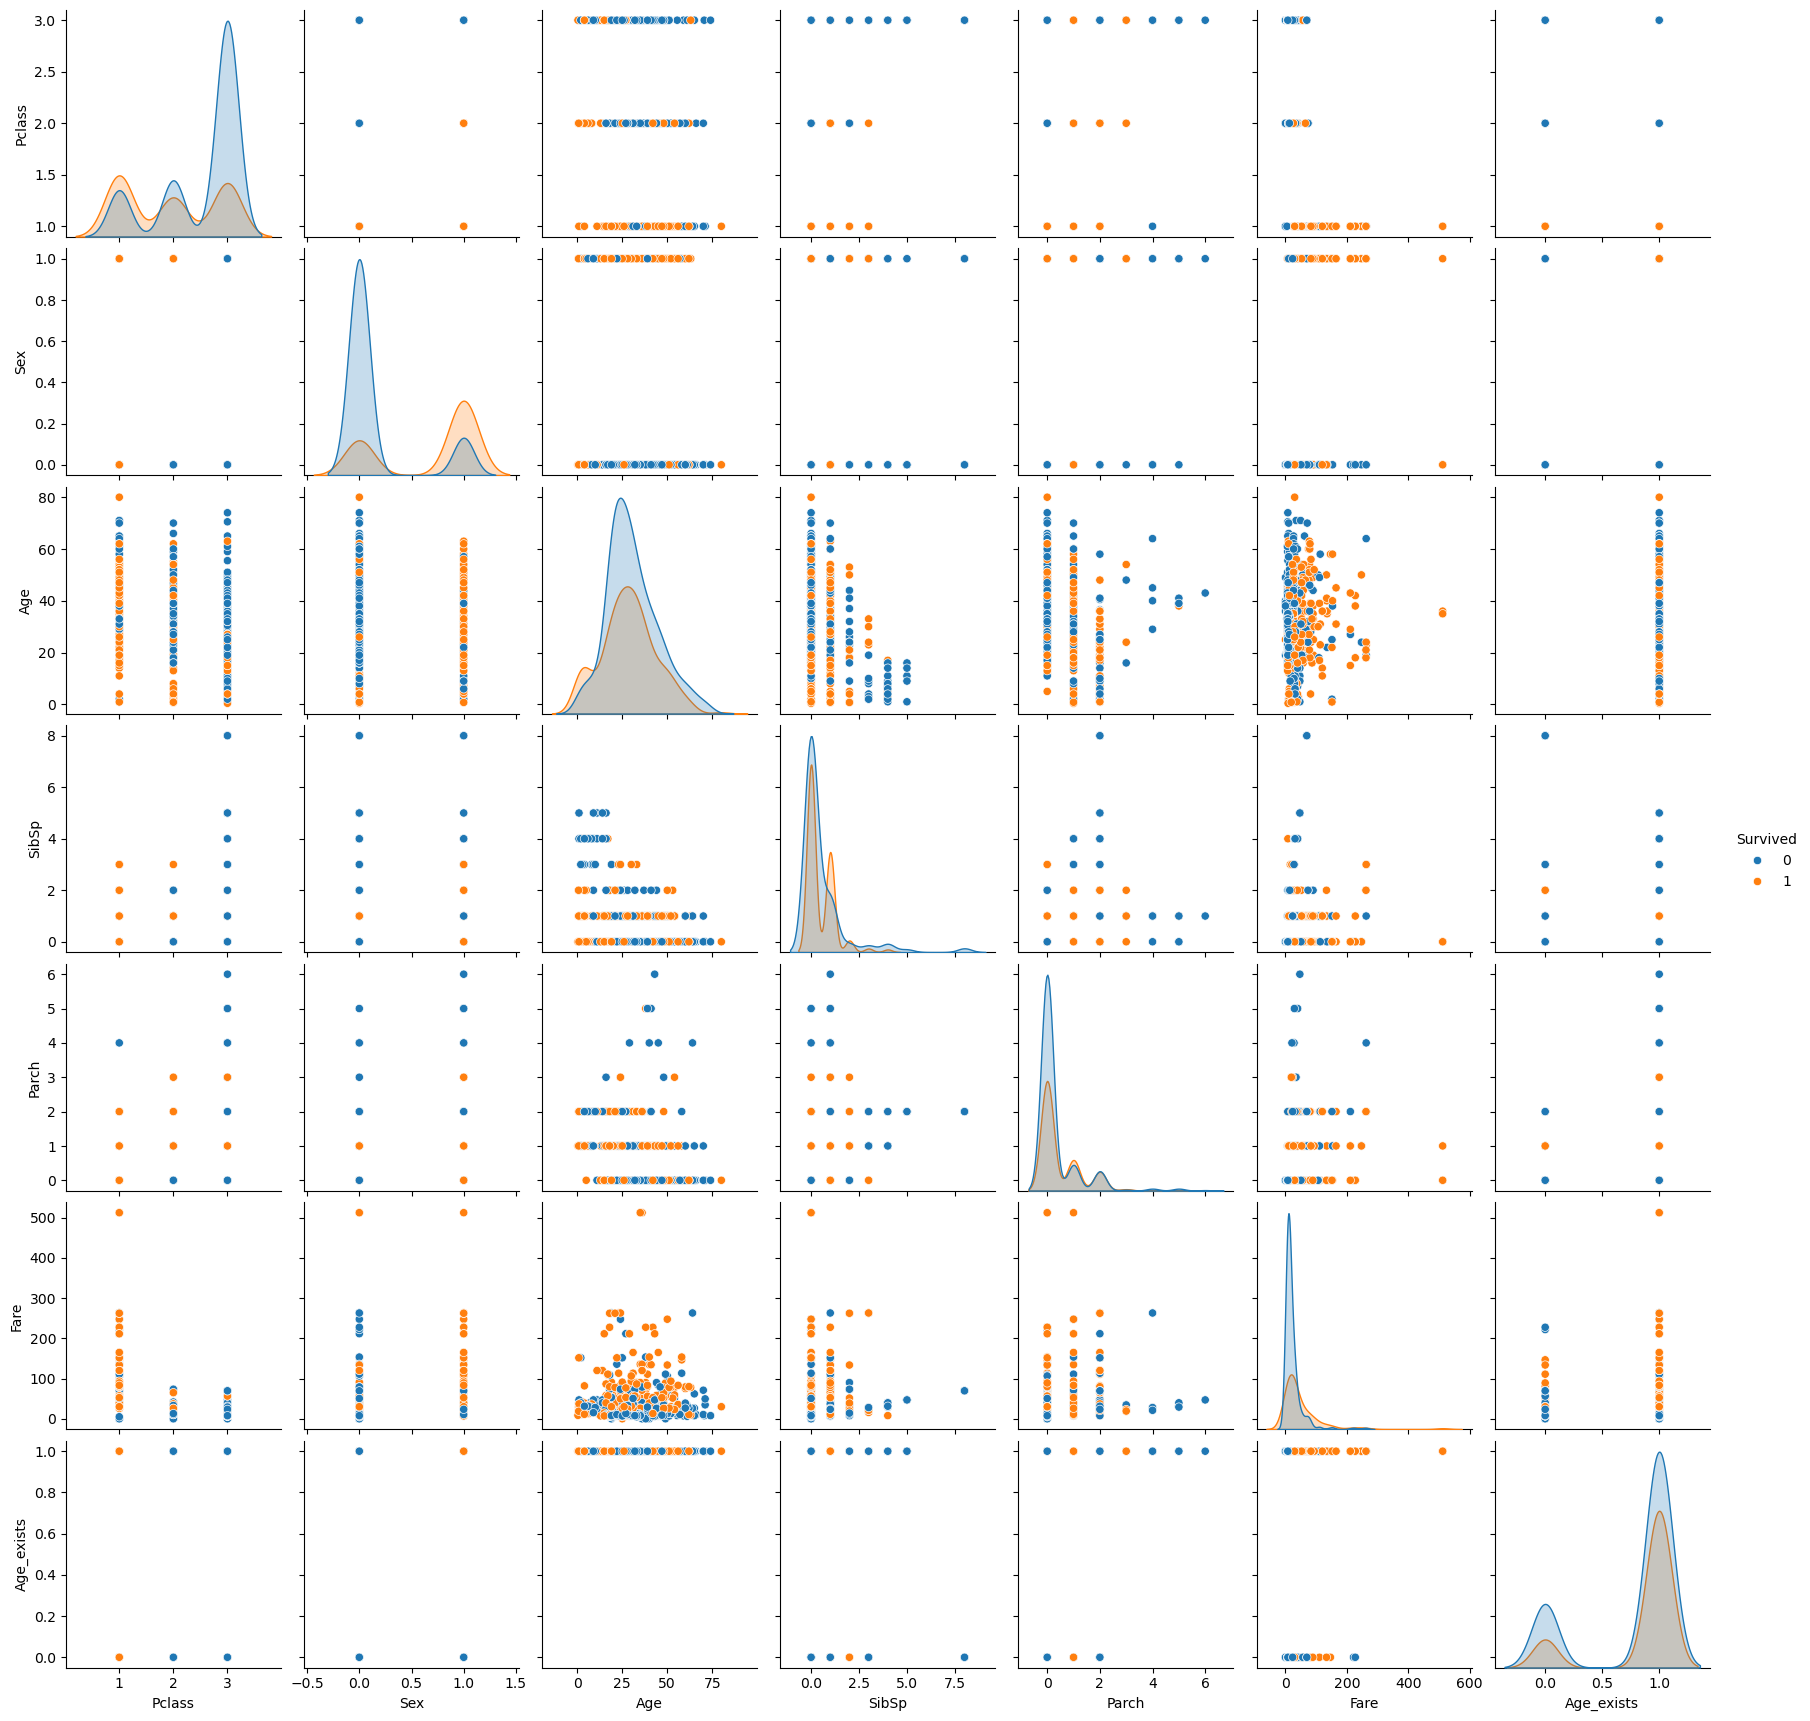

In [75]:
sns.pairplot(titanic_numeric, hue="Survived")

<p>Should try and figure out if embarked has an influence on survival</p>

     PassengerId  Survived  Pclass                                       Name  \
61            62         1       1                        Icard, Miss. Amelie   
829          830         1       1  Stone, Mrs. George Nelson (Martha Evelyn)   

        Sex   Age  SibSp  Parch  Ticket  Fare Cabin Embarked  Age_exists  
61   female  38.0      0      0  113572  80.0   B28      NaN        True  
829  female  62.0      0      0  113572  80.0   B28      NaN        True  "]


<Axes: xlabel='Embarked', ylabel='Embarked'>

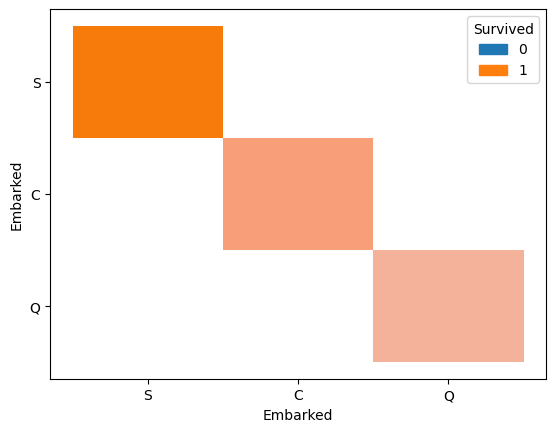

In [76]:
print(f'{titanic_data.loc[titanic_data.Embarked.isna(),:]}"]')
sns.histplot(titanic_data, x="Embarked", y="Embarked", hue="Survived")

In [77]:
print(titanic_numeric['Embarked'].value_counts(dropna=False))

Embarked
S      644
C      168
Q       77
NaN      2
Name: count, dtype: int64


In [78]:
titanic_numeric.loc[titanic_numeric.Embarked.isna(),:] 

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_exists
61,1,1,1,38.0,0,0,80.0,NaN,True
829,1,1,1,62.0,0,0,80.0,NaN,True


In [ ]:
# Since both survived using port with highest livability
titanic_numeric.loc[titanic_numeric.Embarked.isna(),'Embarked'] = "S"

In [80]:
titanic_numeric.count()

Survived      891
Pclass        891
Sex           891
Age           714
SibSp         891
Parch         891
Fare          891
Embarked      891
Age_exists    891
dtype: int64

In [81]:
titanic_numeric.to_csv("titanic_numeric.csv")

In [82]:
titanic_numeric

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Age_exists
0,0,3,0,22.0,1,0,7.2500,S,True
1,1,1,1,38.0,1,0,71.2833,C,True
2,1,3,1,26.0,0,0,7.9250,S,True
3,1,1,1,35.0,1,0,53.1000,S,True
4,0,3,0,35.0,0,0,8.0500,S,True
...,...,...,...,...,...,...,...,...,...
886,0,2,0,27.0,0,0,13.0000,S,True
887,1,1,1,19.0,0,0,30.0000,S,True
888,0,3,1,NaN,1,2,23.4500,S,False
889,1,1,0,26.0,0,0,30.0000,C,True
